<h1>CLASSIFICATION</h1>

<p>Muhammad Hafidh Raditya</p>
<p>1301184079</p>
<p>IF-42-03</p>

In [94]:
import random as rd
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import style
from sklearn import datasets, linear_model
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

<h3>Import dataset yang diberikan</h3>

In [95]:
datatrain = pd.read_csv("salju_train.csv")
datatrain

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,109091,31/01/2009,C38,20.1,23.7,0.0,7.2,8.9,ESE,43.0,...,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,Tidak,Ya
109091,109092,03/11/2010,C16,15.7,25.2,0.0,NaN,NaN,SSE,37.0,...,52.0,52.0,1018.4,1016.2,NaN,NaN,23.8,24.4,Tidak,Ya
109092,109093,11/11/2010,C17,7.5,20.4,1.6,NaN,NaN,NW,33.0,...,92.0,51.0,1014.5,1010.6,NaN,NaN,12.6,19.8,Ya,Tidak
109093,109094,16/04/2012,C11,10.8,29.8,0.0,7.8,11.2,E,48.0,...,35.0,18.0,1020.0,1015.8,0.0,1.0,21.7,29.2,Tidak,Tidak


In [96]:
datatest = pd.read_csv("salju_test.csv")
datatest

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,...,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,...,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,...,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,...,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,...,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No
18179,31/08/2010,C21,6.7,22.9,0.0,NaN,NaN,NaN,NaN,NaN,...,84.0,35.0,NaN,NaN,1.0,2.0,11.8,22.0,No,No
18180,24/08/2013,C12,12.5,26.7,0.0,9.0,10.8,NE,35.0,SW,...,56.0,45.0,1021.9,1018.1,5.0,5.0,22.9,25.4,No,No


<h3>Data preprocessing untuk data train</h3>

<p>Cek apakah data terdapat null value</p>

In [97]:
datatrain.isnull().sum()

id                              0
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1122
SuhuMax                       929
Hujan                        2431
Penguapan                   47024
SinarMatahari               52379
ArahAnginTerkencang          7744
KecepatanAnginTerkencang     7696
ArahAngin9am                 7923
ArahAngin3pm                 3197
KecepatanAngin9am            1353
KecepatanAngin3pm            2303
Kelembaban9am                2002
Kelembaban3pm                3374
Tekanan9am                  11327
Tekanan3pm                  11308
Awan9am                     41844
Awan3pm                     44471
Suhu9am                      1340
Suhu3pm                      2698
BersaljuHariIni              2431
BersaljuBesok                2431
dtype: int64

<p>Drop null value</p>

In [98]:
datatrain.dropna(inplace=True)
datatrain.shape

(42411, 24)

In [99]:
datatrain.isnull().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

<p>Ubah categorical data menjadi numerical data agar bisa dibandingkan</p>

In [100]:
categorical = datatrain.dtypes==object
categorical_cols = datatrain.columns[categorical].tolist()
datatrain[categorical_cols] = datatrain[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))
datatrain[categorical_cols].head()
datatrain

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,4,849,15,7.3,24.5,0.0,8.4,10.4,11,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5,3188,23,5.9,20.3,0.0,3.6,12.6,3,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,6,1271,2,14.4,21.8,0.0,3.2,4.4,12,39.0,...,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,7,1380,15,7.7,18.7,0.2,5.6,9.7,14,46.0,...,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0
8,9,1903,24,18.4,35.3,0.0,10.0,12.5,1,33.0,...,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109080,109081,232,18,16.8,34.1,0.0,12.8,10.3,1,85.0,...,48.0,28.0,1013.4,1009.2,1.0,4.0,25.6,33.0,0,0
109082,109083,2396,4,8.7,19.0,0.0,1.4,9.6,13,24.0,...,81.0,59.0,1024.6,1022.3,2.0,2.0,10.8,16.5,0,0
109088,109089,1877,6,14.3,26.2,0.0,8.0,12.6,5,50.0,...,51.0,37.0,1019.2,1015.6,0.0,2.0,21.1,25.5,0,0
109090,109091,3309,17,20.1,23.7,0.0,7.2,8.9,2,43.0,...,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,0,1


<p>Drop column/atribut yang tidak diperlukan</p>

In [101]:
unscaled_datatrain = datatrain.drop(columns=['id','Tanggal','KodeLokasi'])

In [102]:
unscaled_datatrain

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,7.3,24.5,0.0,8.4,10.4,11,54.0,3,12,13.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5.9,20.3,0.0,3.6,12.6,3,37.0,6,2,22.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,14.4,21.8,0.0,3.2,4.4,12,39.0,12,11,19.0,...,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,7.7,18.7,0.2,5.6,9.7,14,46.0,7,14,19.0,...,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0
8,18.4,35.3,0.0,10.0,12.5,1,33.0,0,2,11.0,...,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109080,16.8,34.1,0.0,12.8,10.3,1,85.0,1,1,30.0,...,48.0,28.0,1013.4,1009.2,1.0,4.0,25.6,33.0,0,0
109082,8.7,19.0,0.0,1.4,9.6,13,24.0,13,9,22.0,...,81.0,59.0,1024.6,1022.3,2.0,2.0,10.8,16.5,0,0
109088,14.3,26.2,0.0,8.0,12.6,5,50.0,7,4,13.0,...,51.0,37.0,1019.2,1015.6,0.0,2.0,21.1,25.5,0,0
109090,20.1,23.7,0.0,7.2,8.9,2,43.0,9,2,24.0,...,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,0,1


<p>Cek data yang tergolong outlier menggunakan boxplot</p>

<AxesSubplot:>

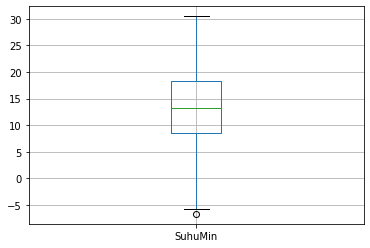

In [103]:
unscaled_datatrain.boxplot(column=["SuhuMin"])

<AxesSubplot:>

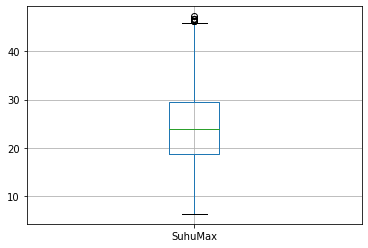

In [104]:
unscaled_datatrain.boxplot(column=["SuhuMax"])

<AxesSubplot:>

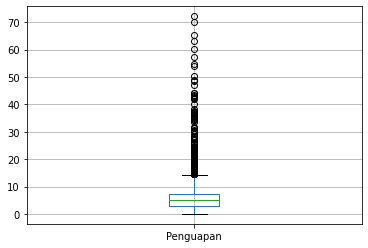

In [105]:
unscaled_datatrain.boxplot(column=["Penguapan"])

<AxesSubplot:>

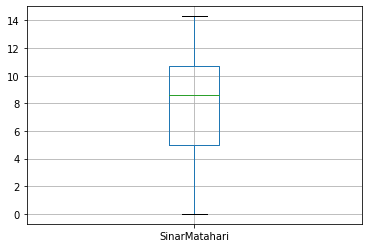

In [106]:
unscaled_datatrain.boxplot(column=["SinarMatahari"])

<AxesSubplot:>

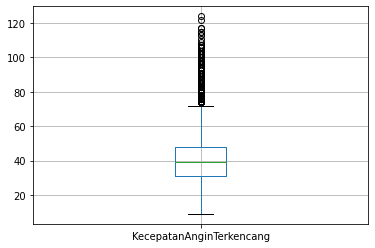

In [107]:
unscaled_datatrain.boxplot(column=["KecepatanAnginTerkencang"])

<AxesSubplot:>

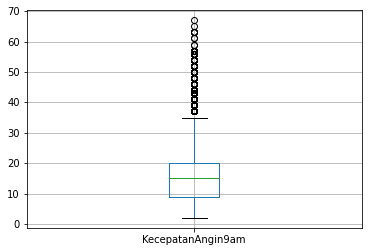

In [108]:
unscaled_datatrain.boxplot(column=["KecepatanAngin9am"])

<AxesSubplot:>

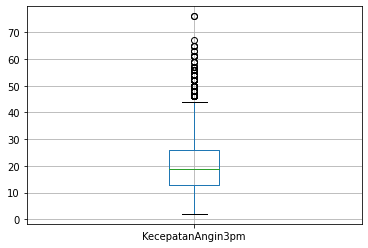

In [109]:
unscaled_datatrain.boxplot(column=["KecepatanAngin3pm"])

<AxesSubplot:>

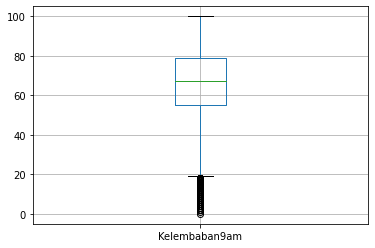

In [110]:
unscaled_datatrain.boxplot(column=["Kelembaban9am"])

<AxesSubplot:>

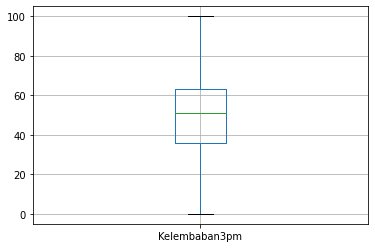

In [111]:
unscaled_datatrain.boxplot(column=["Kelembaban3pm"])

<AxesSubplot:>

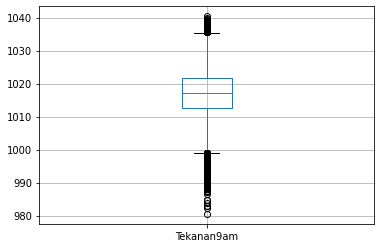

In [112]:
unscaled_datatrain.boxplot(column=["Tekanan9am"])

<AxesSubplot:>

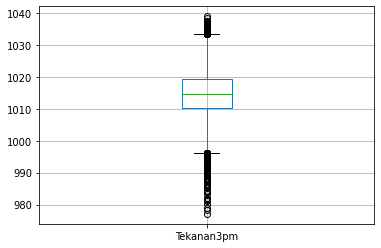

In [113]:
unscaled_datatrain.boxplot(column=["Tekanan3pm"])

<AxesSubplot:>

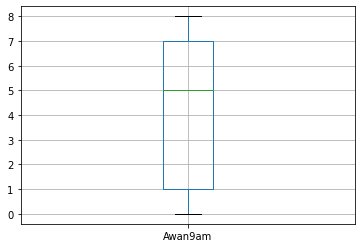

In [114]:
unscaled_datatrain.boxplot(column=["Awan9am"])

<AxesSubplot:>

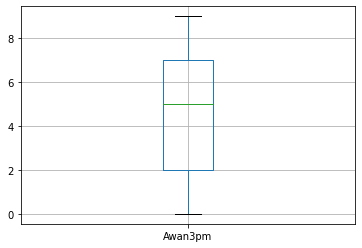

In [115]:
unscaled_datatrain.boxplot(column=["Awan3pm"])

<AxesSubplot:>

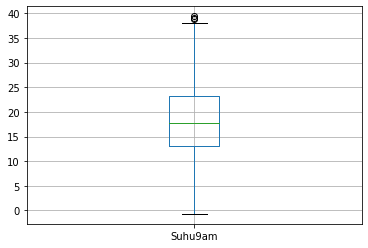

In [116]:
unscaled_datatrain.boxplot(column=["Suhu9am"])

<AxesSubplot:>

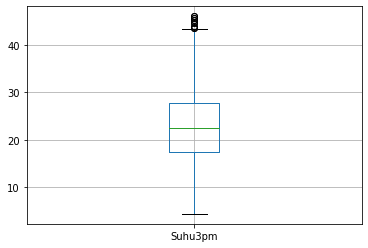

In [117]:
unscaled_datatrain.boxplot(column=["Suhu3pm"])

<p>Lakukan drop pada data yang tergolong outlier</p>

In [118]:
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.SuhuMin < -5].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.SuhuMax > 43].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.KecepatanAnginTerkencang > 72].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.Penguapan > 14].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.KecepatanAngin9am > 35].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.KecepatanAngin3pm > 45].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.Kelembaban9am < 20].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.Tekanan9am < 1000].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.Tekanan9am > 1035].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.Tekanan3pm < 997].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.Tekanan3pm > 1032].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.Suhu9am > 38].index ,inplace =True)
unscaled_datatrain.drop(unscaled_datatrain[unscaled_datatrain.Suhu3pm > 42].index ,inplace =True)

In [119]:
unscaled_datatrain

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,7.3,24.5,0.0,8.4,10.4,11,54.0,3,12,13.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5.9,20.3,0.0,3.6,12.6,3,37.0,6,2,22.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,14.4,21.8,0.0,3.2,4.4,12,39.0,12,11,19.0,...,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,7.7,18.7,0.2,5.6,9.7,14,46.0,7,14,19.0,...,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0
8,18.4,35.3,0.0,10.0,12.5,1,33.0,0,2,11.0,...,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109079,12.8,20.6,0.6,3.6,3.6,13,48.0,13,13,19.0,...,81.0,72.0,1020.5,1020.2,7.0,7.0,14.8,17.7,0,0
109082,8.7,19.0,0.0,1.4,9.6,13,24.0,13,9,22.0,...,81.0,59.0,1024.6,1022.3,2.0,2.0,10.8,16.5,0,0
109088,14.3,26.2,0.0,8.0,12.6,5,50.0,7,4,13.0,...,51.0,37.0,1019.2,1015.6,0.0,2.0,21.1,25.5,0,0
109090,20.1,23.7,0.0,7.2,8.9,2,43.0,9,2,24.0,...,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,0,1


<p>Import data yang belum dilakukan minmaxscaler kedalam file csv</p>

In [120]:
unscaled_datatrain.to_csv('unscaled_train.csv')

<p>Lakukan minmaxscaler</p>

In [121]:
mms = MinMaxScaler()
scaler = mms.fit_transform(unscaled_datatrain)
col_new = ['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm','BersaljuHariIni','BersaljuBesok']
scaled_datatrain = pd.DataFrame(scaler, columns=col_new)
scaled_datatrain

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.352601,0.495913,0.00000,0.600000,0.727273,0.733333,0.714286,0.200000,0.800000,0.333333,...,0.0625,0.161616,0.548571,0.568571,0.125,0.777778,0.422164,0.502660,0.0,0.0
1,0.312139,0.381471,0.00000,0.257143,0.881119,0.200000,0.444444,0.400000,0.133333,0.606061,...,0.4375,0.474747,0.562857,0.505714,0.250,0.666667,0.345646,0.367021,0.0,0.0
2,0.557803,0.422343,0.00000,0.228571,0.307692,0.800000,0.476190,0.800000,0.733333,0.515152,...,0.5375,0.515152,0.460000,0.442857,0.875,0.777778,0.459103,0.446809,0.0,0.0
3,0.364162,0.337875,0.00097,0.400000,0.678322,0.933333,0.587302,0.466667,0.933333,0.515152,...,0.6125,0.303030,0.322857,0.337143,0.125,0.111111,0.316623,0.372340,0.0,0.0
4,0.673410,0.790191,0.00000,0.714286,0.874126,0.066667,0.380952,0.000000,0.133333,0.272727,...,0.3000,0.171717,0.511429,0.468571,0.000,0.000000,0.643799,0.813830,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38859,0.511561,0.389646,0.00291,0.257143,0.251748,0.866667,0.619048,0.866667,0.866667,0.515152,...,0.7625,0.717172,0.585714,0.662857,0.875,0.777778,0.408971,0.356383,0.0,0.0
38860,0.393064,0.346049,0.00000,0.100000,0.671329,0.866667,0.238095,0.866667,0.600000,0.606061,...,0.7625,0.585859,0.702857,0.722857,0.250,0.222222,0.303430,0.324468,0.0,0.0
38861,0.554913,0.542234,0.00000,0.571429,0.881119,0.333333,0.650794,0.466667,0.266667,0.333333,...,0.3875,0.363636,0.548571,0.531429,0.000,0.222222,0.575198,0.563830,0.0,0.0
38862,0.722543,0.474114,0.00000,0.514286,0.622378,0.133333,0.539683,0.600000,0.133333,0.666667,...,0.6750,0.696970,0.551429,0.588571,0.500,0.666667,0.598945,0.473404,0.0,1.0


<p>import data yang sudah dilakukan minmaxscaler kedalam file csv</p>

In [122]:
scaled_datatrain.to_csv("scaled_train.csv")

<h3>Data preprocessing untuk data test</h3>

<p>Cek apakah data terdapat null value</p>

In [123]:
datatest.isnull().sum()

Tanggal                        0
KodeLokasi                     0
SuhuMin                      165
SuhuMax                      165
Hujan                        387
Penguapan                   7856
SinarMatahari               8718
ArahAnginTerkencang         1281
KecepatanAnginTerkencang    1274
ArahAngin9am                1308
ArahAngin3pm                 496
KecepatanAngin9am            198
KecepatanAngin3pm            354
Kelembaban9am                330
Kelembaban3pm                548
Tekanan9am                  1865
Tekanan3pm                  1853
Awan9am                     7042
Awan3pm                     7456
Suhu9am                      219
Suhu3pm                      442
BersaljuHariIni              387
BersaljuBesok                419
dtype: int64

In [124]:
datatest.dropna(inplace=True)
datatest

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
7,09/06/2014,C3,14.4,22.4,0.0,4.4,3.9,SE,28.0,SW,...,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,No,No
8,12/02/2014,C31,20.3,33.7,0.0,11.8,11.1,E,52.0,E,...,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,No,No
10,18/06/2012,C24,8.1,18.2,0.0,1.6,5.1,W,31.0,W,...,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,01/10/2008,C3,13.4,24.9,0.0,6.2,9.7,E,31.0,ENE,...,59.0,51.0,1024.2,1022.0,7.0,7.0,23.0,23.7,No,No
18174,02/08/2015,C12,14.6,27.8,0.0,6.6,10.1,NE,35.0,SE,...,60.0,56.0,1021.8,1018.6,3.0,2.0,22.8,25.3,No,No
18177,14/11/2012,C40,7.8,25.8,0.0,8.0,13.2,NE,31.0,ENE,...,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,No,No
18178,24/10/2015,C40,12.4,26.6,0.0,8.0,11.6,NW,37.0,NE,...,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,No,No


In [125]:
datatest.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

<p>Ubah categorical data menjadi numerical data agar bisa dibandingkan</p>

In [126]:
categorical = datatest.dtypes==object
categorical_cols = datatest.columns[categorical].tolist()
datatest[categorical_cols] = datatest[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))
datatest[categorical_cols].head()
datatest

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,1959,3,9.2,27.2,0.0,5.2,10.4,11,33.0,4,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0,0
3,821,11,17.7,27.0,0.0,4.6,6.7,12,35.0,0,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,0,0
7,777,10,14.4,22.4,0.0,4.4,3.9,9,28.0,12,...,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,0,0
8,1023,11,20.3,33.7,0.0,11.8,11.1,0,52.0,0,...,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,0,0
10,1604,5,8.1,18.2,0.0,1.6,5.1,13,31.0,13,...,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,72,10,13.4,24.9,0.0,6.2,9.7,0,31.0,1,...,59.0,51.0,1024.2,1022.0,7.0,7.0,23.0,23.7,0,0
18174,156,2,14.6,27.8,0.0,6.6,10.1,4,35.0,9,...,60.0,56.0,1021.8,1018.6,3.0,2.0,22.8,25.3,0,0
18177,1277,18,7.8,25.8,0.0,8.0,13.2,4,31.0,1,...,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,0,0
18178,2206,18,12.4,26.6,0.0,8.0,11.6,7,37.0,4,...,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,0,0


<p>Drop column/atribut yang tidak diperlukan</p>

In [127]:
unscaled_datatest = datatest.drop(columns=['Tanggal', 'KodeLokasi'])
unscaled_datatest

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,9.2,27.2,0.0,5.2,10.4,11,33.0,4,3,13.0,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0,0
3,17.7,27.0,0.0,4.6,6.7,12,35.0,0,10,20.0,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,0,0
7,14.4,22.4,0.0,4.4,3.9,9,28.0,12,9,9.0,...,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,0,0
8,20.3,33.7,0.0,11.8,11.1,0,52.0,0,2,20.0,...,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,0,0
10,8.1,18.2,0.0,1.6,5.1,13,31.0,13,13,11.0,...,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,13.4,24.9,0.0,6.2,9.7,0,31.0,1,5,13.0,...,59.0,51.0,1024.2,1022.0,7.0,7.0,23.0,23.7,0,0
18174,14.6,27.8,0.0,6.6,10.1,4,35.0,9,1,13.0,...,60.0,56.0,1021.8,1018.6,3.0,2.0,22.8,25.3,0,0
18177,7.8,25.8,0.0,8.0,13.2,4,31.0,1,7,22.0,...,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,0,0
18178,12.4,26.6,0.0,8.0,11.6,7,37.0,4,14,17.0,...,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,0,0


<p>cek data yang tergolong outlier menggunakan boxplot</p>

<AxesSubplot:>

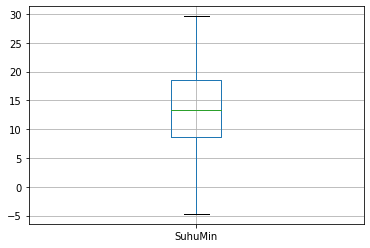

In [128]:
unscaled_datatest.boxplot(column=["SuhuMin"])

<AxesSubplot:>

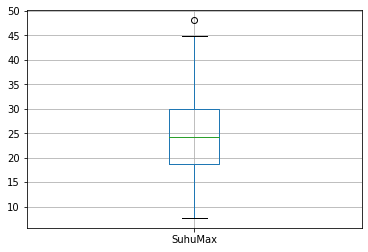

In [129]:
unscaled_datatest.boxplot(column=["SuhuMax"])

<AxesSubplot:>

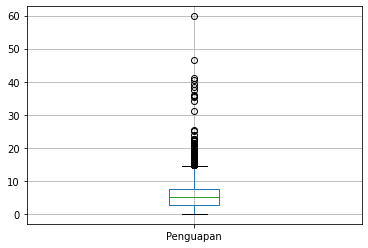

In [130]:
unscaled_datatest.boxplot(column=["Penguapan"])

<AxesSubplot:>

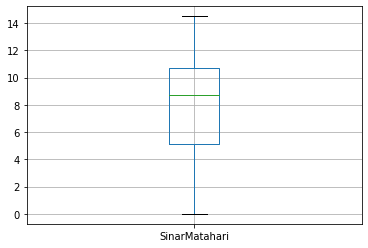

In [131]:
unscaled_datatest.boxplot(column=["SinarMatahari"])

<AxesSubplot:>

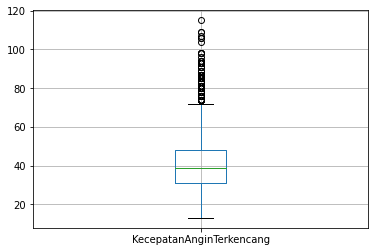

In [132]:
unscaled_datatest.boxplot(column=["KecepatanAnginTerkencang"])

<AxesSubplot:>

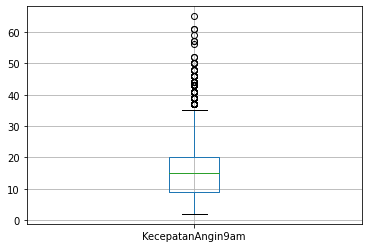

In [133]:
unscaled_datatest.boxplot(column=["KecepatanAngin9am"])

<AxesSubplot:>

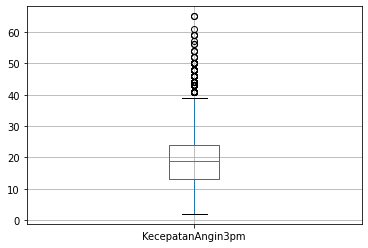

In [134]:
unscaled_datatest.boxplot(column=["KecepatanAngin3pm"])

<AxesSubplot:>

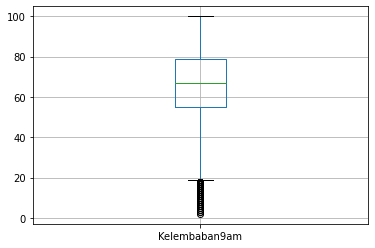

In [135]:
unscaled_datatest.boxplot(column=["Kelembaban9am"])

<AxesSubplot:>

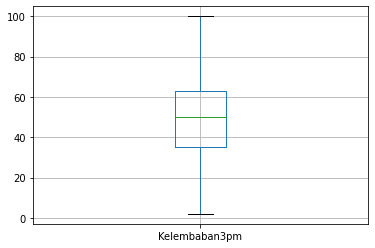

In [136]:
unscaled_datatest.boxplot(column=["Kelembaban3pm"])

<AxesSubplot:>

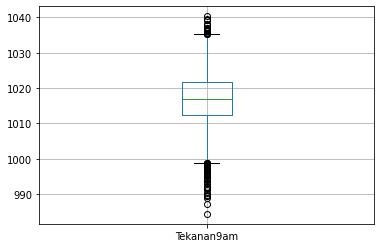

In [137]:
unscaled_datatest.boxplot(column=["Tekanan9am"])

<AxesSubplot:>

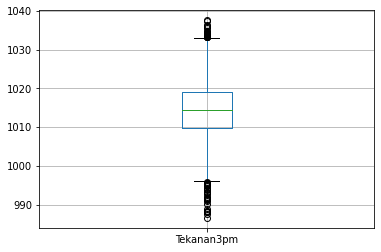

In [138]:
unscaled_datatest.boxplot(column=["Tekanan3pm"])

<AxesSubplot:>

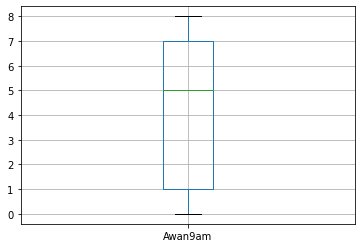

In [139]:
unscaled_datatest.boxplot(column=["Awan9am"])

<AxesSubplot:>

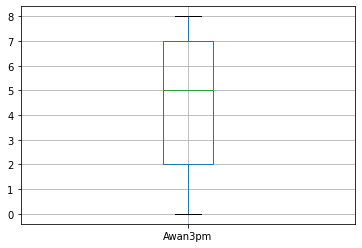

In [140]:
unscaled_datatest.boxplot(column=["Awan3pm"])

<AxesSubplot:>

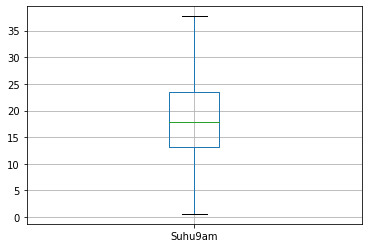

In [141]:
unscaled_datatest.boxplot(column=["Suhu9am"])

<AxesSubplot:>

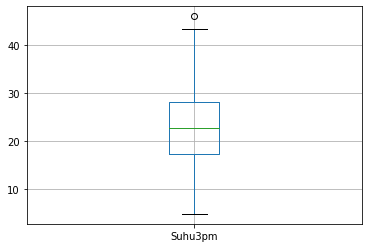

In [142]:
unscaled_datatest.boxplot(column=["Suhu3pm"])

<p>Lakukan drop pada data yang tergolong outlier</p>

In [143]:
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest.SuhuMax > 45].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest.Penguapan > 15].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest.KecepatanAnginTerkencang > 66].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest.KecepatanAngin9am > 35].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest.KecepatanAngin3pm > 39].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest.Kelembaban9am < 20].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest.Tekanan9am > 1035].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest.Tekanan9am < 999].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest.Tekanan3pm > 1032].index ,inplace =True)
unscaled_datatest.drop(unscaled_datatest[unscaled_datatest.Tekanan3pm < 997].index ,inplace =True)

In [144]:
unscaled_datatest

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
2,9.2,27.2,0.0,5.2,10.4,11,33.0,4,3,13.0,...,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,0,0
3,17.7,27.0,0.0,4.6,6.7,12,35.0,0,10,20.0,...,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,0,0
7,14.4,22.4,0.0,4.4,3.9,9,28.0,12,9,9.0,...,57.0,51.0,1022.6,1020.7,7.0,7.0,18.3,20.9,0,0
8,20.3,33.7,0.0,11.8,11.1,0,52.0,0,2,20.0,...,54.0,33.0,1007.7,1005.6,5.0,5.0,24.6,32.2,0,0
10,8.1,18.2,0.0,1.6,5.1,13,31.0,13,13,11.0,...,94.0,48.0,1027.1,1024.5,7.0,7.0,10.3,17.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,13.4,24.9,0.0,6.2,9.7,0,31.0,1,5,13.0,...,59.0,51.0,1024.2,1022.0,7.0,7.0,23.0,23.7,0,0
18174,14.6,27.8,0.0,6.6,10.1,4,35.0,9,1,13.0,...,60.0,56.0,1021.8,1018.6,3.0,2.0,22.8,25.3,0,0
18177,7.8,25.8,0.0,8.0,13.2,4,31.0,1,7,22.0,...,59.0,21.0,1017.1,1014.2,6.0,1.0,16.8,24.0,0,0
18178,12.4,26.6,0.0,8.0,11.6,7,37.0,4,14,17.0,...,59.0,25.0,1022.2,1018.7,1.0,1.0,17.1,25.7,0,0


<p>Import data yang belum dilakukan minmaxscaler kedalam file csv</p>

In [145]:
unscaled_datatest.to_csv("unscaled_test.csv")

<p>Lakukan minmaxscaler</p>

In [146]:
mms = MinMaxScaler()
scaler = mms.fit_transform(unscaled_datatest)
col_new = ['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm','BersaljuHariIni','BersaljuBesok']
scaled_datatest = pd.DataFrame(scaler, columns=col_new)
scaled_datatest

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,0.405248,0.550143,0.0,0.346667,0.717241,0.733333,0.384615,0.266667,0.200000,0.333333,...,0.8625,0.239583,0.541899,0.530259,0.000,0.125,0.384393,0.561453,0.0,0.0
1,0.653061,0.544413,0.0,0.306667,0.462069,0.800000,0.423077,0.000000,0.666667,0.545455,...,0.4375,0.385417,0.307263,0.325648,0.875,0.750,0.627168,0.564246,0.0,0.0
2,0.556851,0.412607,0.0,0.293333,0.268966,0.600000,0.288462,0.800000,0.600000,0.212121,...,0.4625,0.489583,0.653631,0.674352,0.875,0.875,0.511561,0.410615,0.0,0.0
3,0.728863,0.736390,0.0,0.786667,0.765517,0.000000,0.750000,0.000000,0.133333,0.545455,...,0.4250,0.302083,0.237430,0.239193,0.625,0.625,0.693642,0.726257,0.0,0.0
4,0.373178,0.292264,0.0,0.106667,0.351724,0.866667,0.346154,0.866667,0.866667,0.272727,...,0.9250,0.458333,0.779330,0.783862,0.875,0.875,0.280347,0.321229,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6341,0.527697,0.484241,0.0,0.413333,0.668966,0.000000,0.346154,0.066667,0.333333,0.333333,...,0.4875,0.489583,0.698324,0.711816,0.875,0.875,0.647399,0.488827,0.0,0.0
6342,0.562682,0.567335,0.0,0.440000,0.696552,0.266667,0.423077,0.600000,0.066667,0.333333,...,0.5000,0.541667,0.631285,0.613833,0.375,0.250,0.641618,0.533520,0.0,0.0
6343,0.364431,0.510029,0.0,0.533333,0.910345,0.266667,0.346154,0.066667,0.466667,0.606061,...,0.4875,0.177083,0.500000,0.487032,0.750,0.125,0.468208,0.497207,0.0,0.0
6344,0.498542,0.532951,0.0,0.533333,0.800000,0.466667,0.461538,0.266667,0.933333,0.454545,...,0.4875,0.218750,0.642458,0.616715,0.125,0.125,0.476879,0.544693,0.0,0.0


<p>import data yang sudah dilakukan minmaxscaler kedalam file csv</p>

In [147]:
scaled_datatest.to_csv("scaled_test.csv")

<h3>PROSES CLASSIFICATION</h3>

<p>Pada tahap ini kami akan melakukan eksperimen pada dua jenis dataset yang sudah kami buat, yaitu dataset yang sudah dilakukan minmaxscaler dan yang belum dilakukan minmaxscaler. Eksperimen kami lakukan menggunakan dua jenis algoritma, yaitu algoritma Naive Bayes dan algoritma ID3</p>

<h4>1. Prediksi apakah hari ini bersalju atau tidak</h4>

<b>Klasifikasi untuk dataset yang sudah dilakukan minmaxscaler</b>

In [148]:
x_scaled_train = scaled_datatrain[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_scaled_train = scaled_datatrain[['BersaljuHariIni']]
x_scaled_test = scaled_datatest[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_scaled_test = scaled_datatest[['BersaljuHariIni']]

<ul>
    <li><b style="color:red">Algoritma Naive Bayes</b></li>
</ul>

In [149]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Buat model Gaussian Classifier
model = GaussianNB()

#Latih model menggunakan data latih
model.fit(x_scaled_train, y_scaled_train)

#Prediksi respons untuk dataset uji
y_pred_NB = model.predict(x_scaled_test)
y_pred_NB

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0., 0., 0., ..., 0., 0., 0.])

In [150]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



y_true = y_scaled_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[4402  575]
 [   0 1369]]
Accuracy Score : 0.9093917428301292
Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      4977
         1.0       0.70      1.00      0.83      1369

    accuracy                           0.91      6346
   macro avg       0.85      0.94      0.88      6346
weighted avg       0.94      0.91      0.91      6346



<ul>
    <li><b style="color:green">Algoritma ID3</b></li>
</ul>

In [151]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_scaled_train, y_scaled_train)
y_pred_ID3 = model_dt.predict(x_scaled_test)
y_pred_ID3

array([0., 0., 0., ..., 0., 0., 0.])

In [152]:
y_true = y_scaled_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[4796  181]
 [   0 1369]]
Accuracy Score : 0.9714780964387015
Report : 
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      4977
         1.0       0.88      1.00      0.94      1369

    accuracy                           0.97      6346
   macro avg       0.94      0.98      0.96      6346
weighted avg       0.97      0.97      0.97      6346



<ul>
    <li><b style="color:blue">Algoritma KNN</b></li>
</ul>

In [153]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_scaled_train, y_scaled_train)
y_pred_knn = knn.predict(x_scaled_test)
y_pred_knn

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0., 0., 0., ..., 0., 0., 0.])

In [154]:
y_true = y_scaled_test
results = confusion_matrix(y_true, y_pred_knn)
print('Confussion matrix :')
print(results)
print('Accuracy score :', accuracy_score(y_true, y_pred_knn))
print('Report :')
print(classification_report(y_true, y_pred_knn))

Confussion matrix :
[[4764  213]
 [ 937  432]]
Accuracy score : 0.8187834856602584
Report :
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89      4977
         1.0       0.67      0.32      0.43      1369

    accuracy                           0.82      6346
   macro avg       0.75      0.64      0.66      6346
weighted avg       0.80      0.82      0.79      6346



<b>Klasifikasi untuk dataset yang belum dilakukan minmaxscaler</b>

In [155]:
x_unscaled_train = unscaled_datatrain[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_unscaled_train = unscaled_datatrain[['BersaljuHariIni']]
x_unscaled_test = unscaled_datatest[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_unscaled_test = unscaled_datatest[['BersaljuHariIni']]

<ul>
    <li><b style="color:red">Algoritma Naive Bayes</b></li>
</ul>

In [156]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Buat model Gaussian Classifier
model = GaussianNB()

#Latih model menggunakan data latih
model.fit(x_unscaled_train, y_unscaled_train)

#Prediksi respons untuk dataset uji
y_pred_NB = model.predict(x_unscaled_test)
y_pred_NB

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

In [157]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



y_true = y_unscaled_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[4588  389]
 [   0 1369]]
Accuracy Score : 0.9387015442798613
Report : 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4977
           1       0.78      1.00      0.88      1369

    accuracy                           0.94      6346
   macro avg       0.89      0.96      0.92      6346
weighted avg       0.95      0.94      0.94      6346



<ul>
    <li><b style="color:green">Algoritma ID3</b></li>
</ul>

In [158]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_unscaled_train, y_unscaled_train)
y_pred_ID3 = model_dt.predict(x_unscaled_test)
y_pred_ID3

array([0, 0, 0, ..., 0, 0, 0])

In [159]:
y_true = y_unscaled_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[4977    0]
 [   0 1369]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4977
           1       1.00      1.00      1.00      1369

    accuracy                           1.00      6346
   macro avg       1.00      1.00      1.00      6346
weighted avg       1.00      1.00      1.00      6346



<ul>
    <li><b style="color:blue">Algoritma KNN</b></li>
</ul>

In [160]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_unscaled_train, y_unscaled_train)
y_pred_knn = knn.predict(x_unscaled_test)
y_pred_knn

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 0, 0, ..., 0, 0, 0])

In [161]:
y_true = y_unscaled_test
results = confusion_matrix(y_true, y_pred_knn)
print('Confussion matrix :')
print(results)
print('Accuracy score :', accuracy_score(y_true, y_pred_knn))
print('Report :')
print(classification_report(y_true, y_pred_knn))

Confussion matrix :
[[4892   85]
 [ 729  640]]
Accuracy score : 0.8717302237630004
Report :
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4977
           1       0.88      0.47      0.61      1369

    accuracy                           0.87      6346
   macro avg       0.88      0.73      0.77      6346
weighted avg       0.87      0.87      0.86      6346



<h4>2. Prediksi apakah besok bersalju atau tidak</h4>

<b>Klasifikasi untuk dataset yang sudah dilakukan minmaxscaler</b>

In [162]:
x_scaled_train = scaled_datatrain[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_scaled_train = scaled_datatrain[['BersaljuHariIni']]
x_scaled_test = scaled_datatest[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_scaled_test = scaled_datatest[['BersaljuBesok']]

<ul>
    <li><b style="color:red">Algoritma Naive Bayes</b></li>
</ul>

In [163]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Buat model Gaussian Classifier
model = GaussianNB()

#Latih model menggunakan data latih
model.fit(x_scaled_train, y_scaled_train)

#Prediksi respons untuk dataset uji
y_pred_NB = model.predict(x_scaled_test)
y_pred_NB

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0., 0., 0., ..., 0., 0., 0.])

In [164]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



y_true = y_scaled_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[3883 1091]
 [ 519  853]]
Accuracy Score : 0.7462968799243618
Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.78      0.83      4974
         1.0       0.44      0.62      0.51      1372

    accuracy                           0.75      6346
   macro avg       0.66      0.70      0.67      6346
weighted avg       0.79      0.75      0.76      6346



<ul>
    <li><b style="color:green">Algoritma ID3</b></li>
</ul>

In [165]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_scaled_train, y_scaled_train)
y_pred_ID3 = model_dt.predict(x_scaled_test)
y_pred_ID3

array([0., 0., 0., ..., 0., 0., 0.])

In [166]:
y_true = y_scaled_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[4111  863]
 [ 685  687]]
Accuracy Score : 0.7560668137409392
Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      4974
         1.0       0.44      0.50      0.47      1372

    accuracy                           0.76      6346
   macro avg       0.65      0.66      0.66      6346
weighted avg       0.77      0.76      0.76      6346



<ul>
    <li><b style="color:blue">Algoritma KNN</b></li>
</ul>

In [167]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_scaled_train, y_scaled_train)
y_pred_knn = knn.predict(x_scaled_test)
y_pred_knn

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0., 0., 0., ..., 0., 0., 0.])

In [168]:
y_true = y_scaled_test
results = confusion_matrix(y_true, y_pred_knn)
print('Confussion matrix :')
print(results)
print('Accuracy score :', accuracy_score(y_true, y_pred_knn))
print('Report :')
print(classification_report(y_true, y_pred_knn))

Confussion matrix :
[[4694  280]
 [1007  365]]
Accuracy score : 0.7971950835171762
Report :
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      4974
         1.0       0.57      0.27      0.36      1372

    accuracy                           0.80      6346
   macro avg       0.69      0.60      0.62      6346
weighted avg       0.77      0.80      0.77      6346



<b>Klasifikasi untuk dataset yang belum dilakukan minmaxscaler</b>

In [169]:
x_unscaled_train = unscaled_datatrain[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_unscaled_train = unscaled_datatrain[['BersaljuHariIni']]
x_unscaled_test = unscaled_datatest[['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','KecepatanAnginTerkencang','ArahAngin9am','ArahAngin3pm','KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']]
y_unscaled_test = unscaled_datatest[['BersaljuBesok']]

<ul>
    <li><b style="color:red">Algoritma Naive Bayes</b></li>
</ul>

In [170]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Buat model Gaussian Classifier
model = GaussianNB()

#Latih model menggunakan data latih
model.fit(x_unscaled_train, y_unscaled_train)

#Prediksi respons untuk dataset uji
y_pred_NB = model.predict(x_unscaled_test)
y_pred_NB

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

In [171]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



y_true = y_unscaled_test
results = confusion_matrix(y_true, y_pred_NB) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_NB))
print('Report : ')
print(classification_report(y_true, y_pred_NB))

Confusion Matrix :
[[4025  949]
 [ 563  809]]
Accuracy Score : 0.7617396785376616
Report : 
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4974
           1       0.46      0.59      0.52      1372

    accuracy                           0.76      6346
   macro avg       0.67      0.70      0.68      6346
weighted avg       0.79      0.76      0.77      6346



<ul>
    <li><b style="color:green">Algoritma ID3</b></li>
</ul>

In [172]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_unscaled_train, y_unscaled_train)
y_pred_ID3 = model_dt.predict(x_unscaled_test)
y_pred_ID3

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
y_true = y_unscaled_test
results = confusion_matrix(y_true, y_pred_ID3) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_true, y_pred_ID3))
print('Report : ')
print(classification_report(y_true, y_pred_ID3))

Confusion Matrix :
[[4224  750]
 [ 753  619]]
Accuracy Score : 0.7631578947368421
Report : 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4974
           1       0.45      0.45      0.45      1372

    accuracy                           0.76      6346
   macro avg       0.65      0.65      0.65      6346
weighted avg       0.76      0.76      0.76      6346



<ul>
    <li><b style="color:blue">Algoritma KNN</b></li>
</ul>

In [174]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_unscaled_train, y_unscaled_train)
y_pred_knn = knn.predict(x_unscaled_test)
y_pred_knn

c:\users\msi\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 0, 0, ..., 0, 0, 0])

In [175]:
y_true = y_unscaled_test
results = confusion_matrix(y_true, y_pred_knn)
print('Confussion matrix :')
print(results)
print('Accuracy score :', accuracy_score(y_true, y_pred_knn))
print('Report :')
print(classification_report(y_true, y_pred_knn))

Confussion matrix :
[[4659  315]
 [ 962  410]]
Accuracy score : 0.7987708792940434
Report :
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4974
           1       0.57      0.30      0.39      1372

    accuracy                           0.80      6346
   macro avg       0.70      0.62      0.64      6346
weighted avg       0.77      0.80      0.77      6346

